## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

# Univariante Analysis

## 1. Understand Dataset

In [2]:
file_path = r"E:\PrepInsta Winter Internship\Week6\Task-2\train.csv"
data = pd.read_csv(file_path)
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [5]:
data.shape

(9800, 18)

In [6]:
data.info

<bound method DataFrame.info of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520      

In [7]:
data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [8]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

## 2. Data Cleaning

In [9]:
data.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [10]:
# Fill missing values in the postal code with most frequent value
most_frequent_value = data['Postal Code'].mode().iloc[0]
data['Postal Code'] = data['Postal Code'].fillna(most_frequent_value)

In [11]:
data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

## 3. Data Types

In [12]:
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [13]:
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst = True)
data['Ship Date'] = pd.to_datetime(data['Ship Date'], dayfirst = True)

In [14]:
data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

## 4. Descriptive Statistics

In [15]:
#Calculate basic descriptive statistics for key numeric variables 
EDA = data.describe()
EDA

,Row ID,Order Date,Ship Date,Postal Code,Sales
count,9800.000000,9800,9800,9800.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,55222.544694,230.769059
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,23223.000000,17.248000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,57551.000000,54.490000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.605000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000
std,2829.160653,NaN,NaN,32059.043706,626.651875


## 5. Histograms

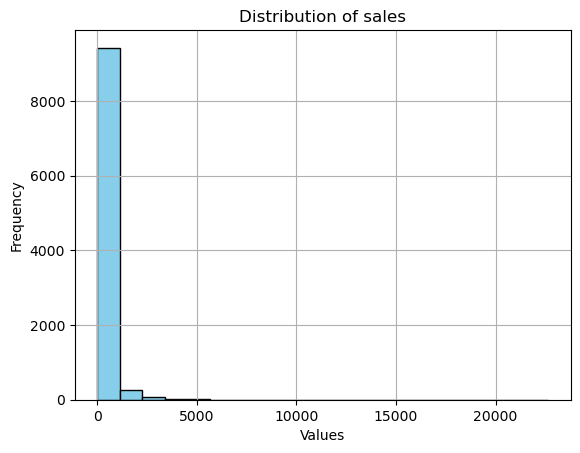

In [16]:
#Creating histograms to visualize the distribution of numeric variables
plt.hist(data['Sales'],bins = 20, color = 'skyblue', edgecolor = 'black')
plt.title(f'Distribution of sales')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid('True')
plt.show()

In [17]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


## 6. Time series plots

### Plot time series graphs to understand the trends and patterns in sales over the 4-year period.


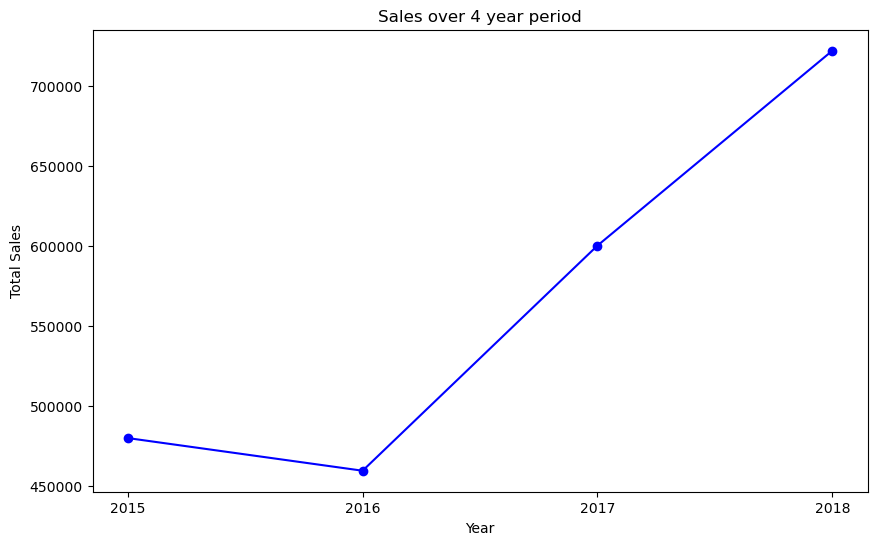

In [18]:
data['Order Date'] = data['Order Date']
data['Year'] = data['Order Date'].dt.year                # Extract the year from the 'Order Date' column
sales_in_4_years = data.groupby('Year')['Sales'].sum()   # Group by year and sum the sales for each year
# Plotting the time series data by year
plt.figure(figsize = (10,6))
plt.plot(sales_in_4_years.index.astype(int),sales_in_4_years.values,marker = 'o',linestyle = '-',color = 'b')
plt.title('Sales over 4 year period')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(sales_in_4_years.index)
plt.show()

## 7. Seasonal decomposiition

### Decompose time series data into components like trend, seasonality, and residuals for deeper insights.


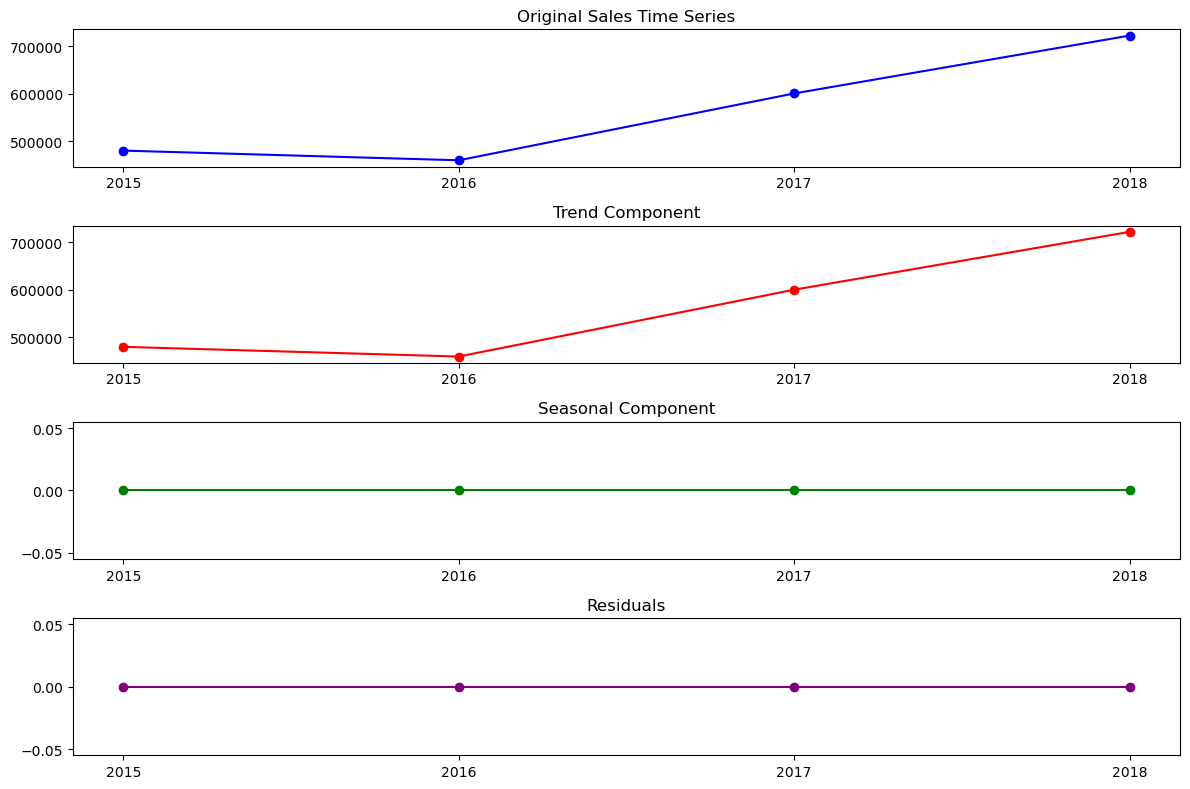

In [19]:
# Plotting the original time series data by year
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(sales_in_4_years, marker='o', linestyle='-', color='b')
plt.title('Original Sales Time Series')
plt.xticks(sales_in_4_years.index)

# Decompose time series data into trend, seasonality, and residuals
result = seasonal_decompose(sales_in_4_years, model='additive', period=1)

# Plotting the decomposed components
plt.subplot(412)
plt.plot(result.trend, marker='o', linestyle='-', color='r')
plt.title('Trend Component')
plt.xticks(sales_in_4_years.index)

plt.subplot(413)
plt.plot(result.seasonal, marker='o', linestyle='-', color='g')
plt.title('Seasonal Component')
plt.xticks(sales_in_4_years.index)

plt.subplot(414)
plt.plot(result.resid, marker='o', linestyle='-', color='purple')
plt.title('Residuals')
plt.xticks(sales_in_4_years.index)

plt.tight_layout()
plt.show()

## 8. Box plots

### Use box plots to identify outliers and understand the distribution of numeric variables.

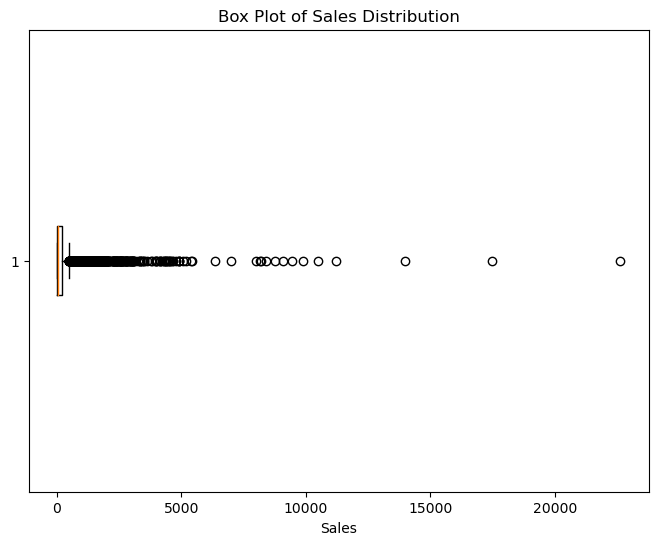

In [20]:
numerical_columns = ['Sales']
plt.figure(figsize=(8, 6))
plt.boxplot(data['Sales'], vert=False)  # vert=False for horizontal box plot
plt.title('Box Plot of Sales Distribution')
plt.xlabel('Sales')
plt.show()

## 9. Sales distribution by sales

###  Visualize the distribution of sales across different categories using bar charts or pie charts.

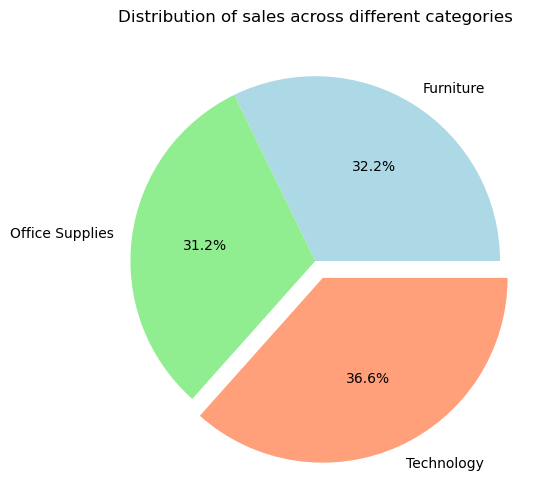

In [21]:
sales_by_category = data.groupby('Category')['Sales'].sum()  # Group by category and sum the sales for each category
# create a pie chart 
colors = ['lightblue', 'lightgreen', 'lightsalmon']
plt.figure(figsize= (10,6))
explode = (0, 0, 0.1) 
plt.pie(sales_by_category.values,labels = sales_by_category.index,autopct = '%1.1f%%',colors = colors,explode=explode,startangle=0)
plt.title('Distribution of sales across different categories')
plt.show()

## 10. Sales variation over Time

### Plot line charts to observe how sales vary over different time periods (months, quarters, years)

In [22]:
montly_sales = data.groupby(data['Order Date'].dt.month)['Sales'].sum()
montly_sales

Order Date
1      94291.6296
2      59371.1154
3     197573.5872
4     136283.0006
5     154086.7237
6     145837.5233
7     145535.6890
8     157315.9270
9     300103.4117
10    199496.2947
11    350161.7110
12    321480.1695
Name: Sales, dtype: float64

In [23]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016


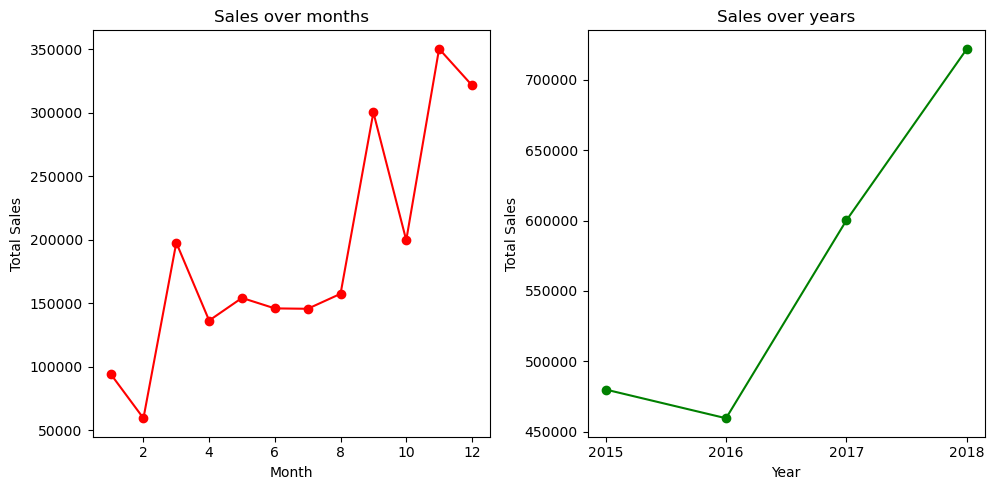

In [24]:
# Extract different time periods (Month, Quarter, Year)
data['Month'] = data['Order Date'].dt.month
data['Quarter'] = data['Order Date'].dt.to_period('Q')
# 'Year' column already exists in the data

# Group by different time periods and sum the sales for each period
sales_by_month = data.groupby('Month')['Sales'].sum()
sales_by_quarter = data.groupby('Quarter')['Sales'].sum()
sales_by_year = data.groupby('Year')['Sales'].sum()

#plotting line charts
plt.figure(figsize=(15,5))

# Sales over months
plt.subplot(131)
plt.plot(sales_by_month.index, sales_by_month.values, marker = 'o', linestyle = '-', color = 'r')
plt.title('Sales over months')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Sales over years
plt.subplot(132)
plt.plot(sales_by_year.index, sales_by_year.values, marker = 'o', linestyle = '-', color = 'g')
plt.title('Sales over years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(sales_by_year.index)

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Total Sales')

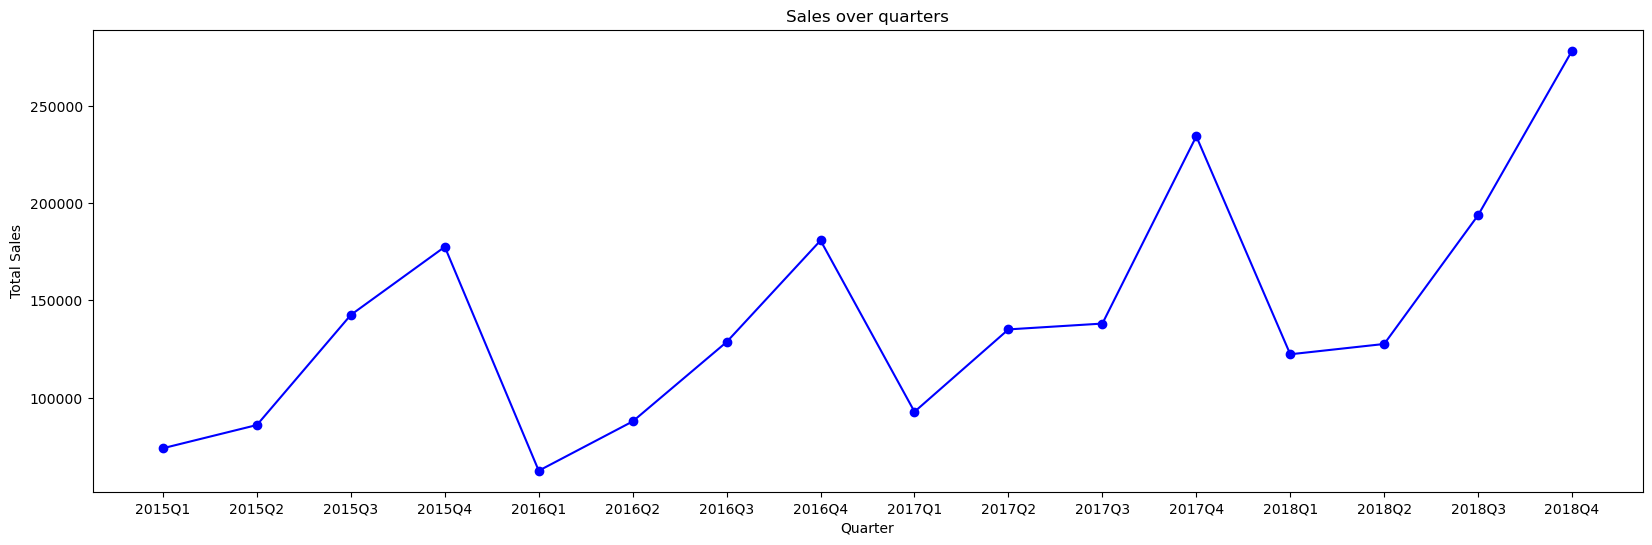

In [25]:
# Extract different time periods (Month, Quarter, Year)
data['Quarter'] = data['Order Date'].dt.to_period('Q')
sales_by_quarter = data.groupby('Quarter')['Sales'].sum()
# Sales over Quarters
plt.figure(figsize=(20,6))
plt.plot(sales_by_quarter.index.astype(str), sales_by_quarter.values, marker = 'o', linestyle = '-', color = 'b')
plt.title('Sales over quarters')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')

# Bivariate Analysis

## 1. Correlation Analysis

### Examine the correlation between sales and other relevant numeric variables.

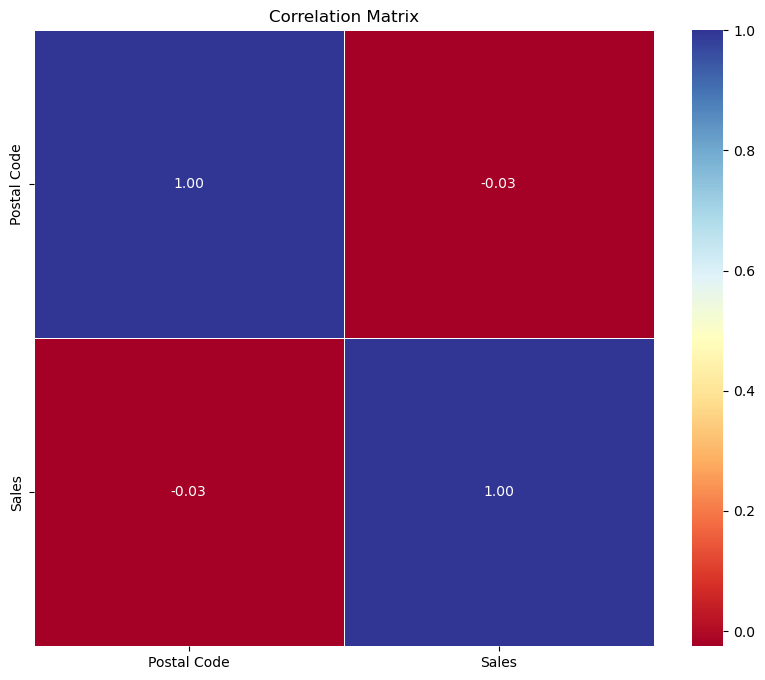

In [26]:
numeric_columns = ['Postal Code','Sales']             # Selecting numerical columns
numeric_data = data[numeric_columns]
correlation_matrix = numeric_data.corr()           # Calculating correlation matrix
# Visualizing correlation matrix using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'RdYlBu', fmt = '.2f', linewidth = 0.5)
plt.title('Correlation Matrix')
plt.show()

## 2. Scatter plots

### Plot scatter plots to explore the relationship between sales and another numeric variable.

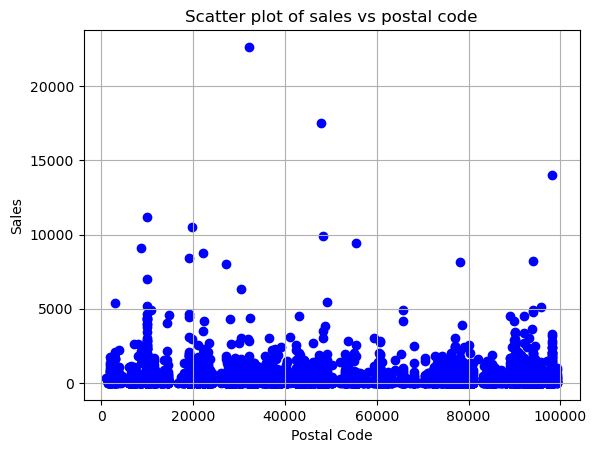

In [27]:
# Create scatter plot
plt.scatter(data['Postal Code'], data['Sales'], color = 'blue', marker = 'o', label = 'Sales')
plt.title('Scatter plot of sales vs postal code')
plt.xlabel('Postal Code')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

## 3. Pair plots

### Use pair plots for a quick overview of relationships between multiple numeric variables.

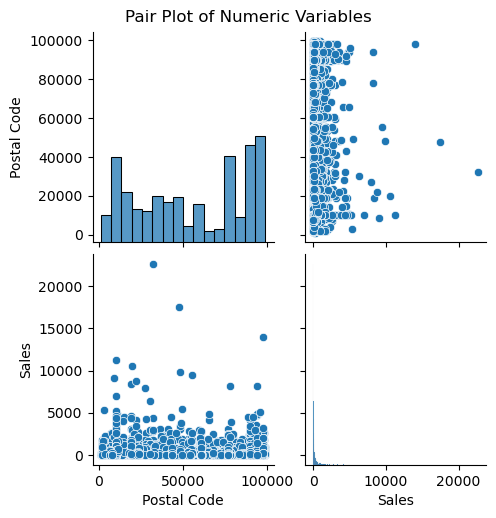

In [28]:
sns.pairplot(numeric_data)
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

## 4. Category-wise sales trends

### Analyze how sales trends differ across different categories using line charts.

In [29]:
df = pd.DataFrame(data)
grouped_data = df.groupby(['Year','Category'])['Sales'].sum()
grouped_data

Year  Category       
2015  Furniture          156477.8811
      Office Supplies    149512.8200
      Technology         173865.5070
2016  Furniture          164053.8674
      Office Supplies    133124.4070
      Technology         162257.7310
2017  Furniture          195813.0400
      Office Supplies    182417.5660
      Technology         221961.9440
2018  Furniture          212313.7872
      Office Supplies    240367.5410
      Technology         269370.6910
Name: Sales, dtype: float64

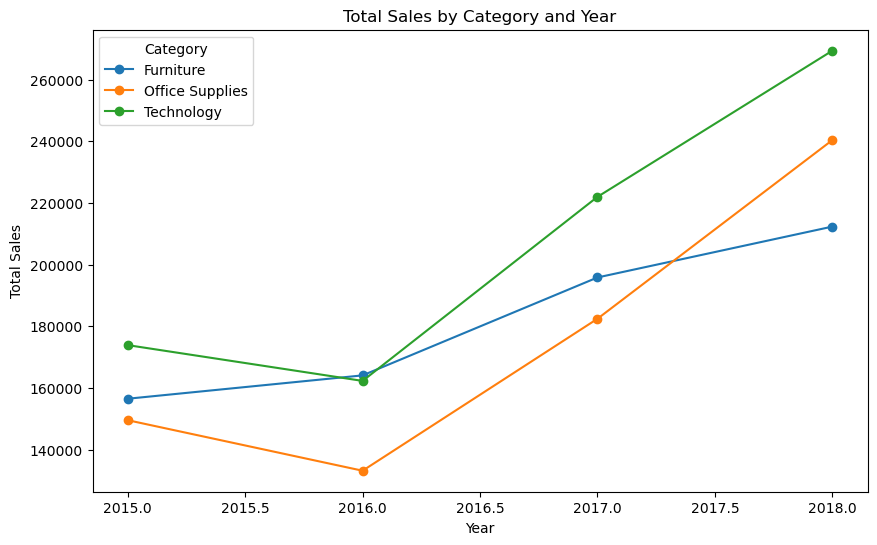

In [30]:
grouped_data_unstacked = grouped_data.unstack()          # 'unstack' method is used to pivot the data and help for plotting

# Plotting the data
grouped_data_unstacked.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Total Sales by Category and Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Category')
plt.show()

## 5. Heatmaps

###  Create heatmaps to visualize the correlation matrix for better insights.

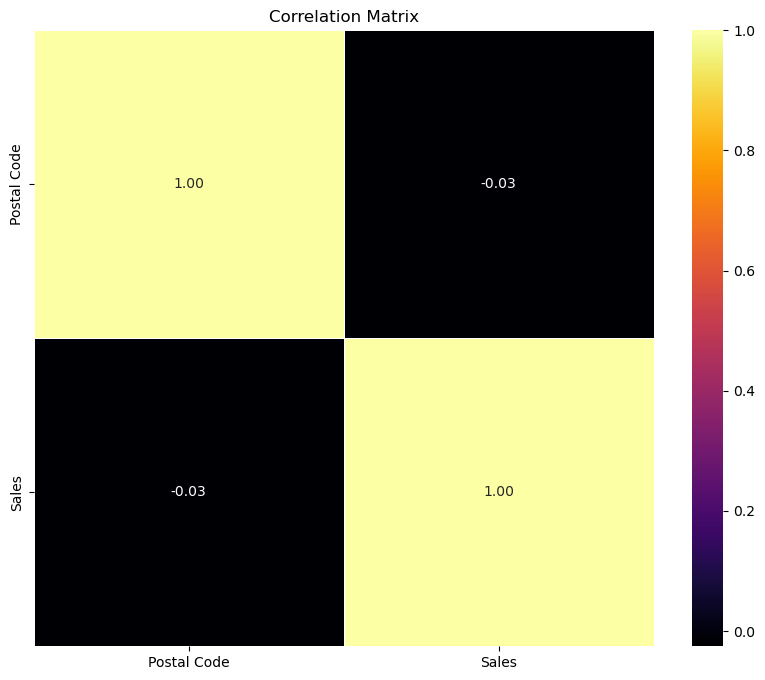

In [31]:
# Visualizing correlation matrix using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'inferno', fmt = '.2f', linewidth = 0.5)
plt.title('Correlation Matrix')
plt.show()

## 6. Sales by region

### Compare sales across different regions using bar charts

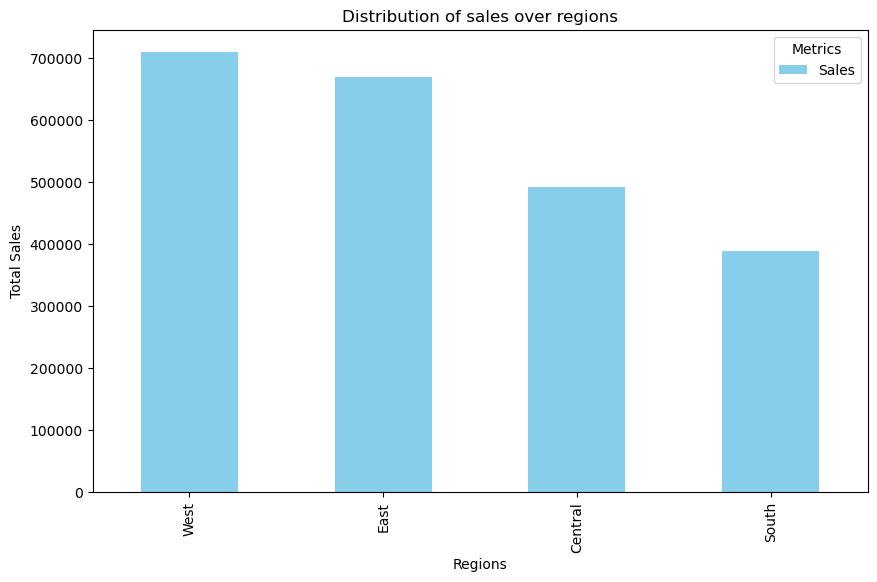

In [32]:
sales_by_region = data.groupby('Region')['Sales'].sum()           # Group by different regions and sum the sales for each region
sales_by_region = sales_by_region.sort_values(ascending = False)  # sort in descending order
sales_by_region.plot(kind = 'bar', stacked =True, figsize = (10,6),color = 'skyblue') # Visualize sales across different regions using stacked bar chart
plt.title('Distribution of sales over regions')
plt.xlabel('Regions')
plt.ylabel('Total Sales')
plt.legend(title='Metrics', loc='upper right')
plt.show()

In [33]:
sales_by_region

Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

## 7. Customer Segment Analysis

### Explore sales trends for different customer segments using line charts or bar charts.

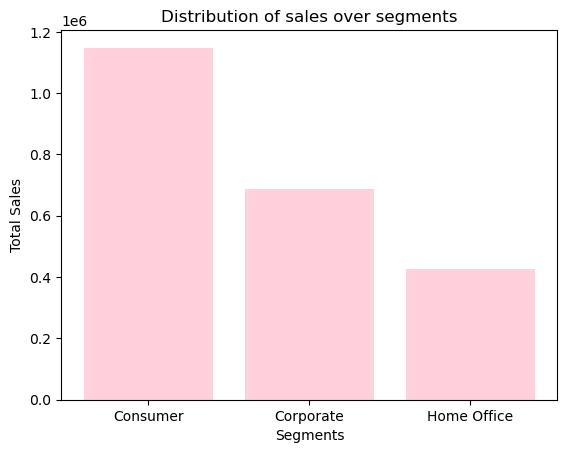

In [34]:
sales_by_segment = data.groupby('Segment')['Sales'].sum()           # Group by different segment and sum the sales for each segment
sales_by_segment = sales_by_segment.sort_values(ascending = False)  # sort in descending order
plt.bar(sales_by_segment.index,sales_by_segment.values,color = '#FFD1DC') # Visualize sales across different regions using bar chart
plt.title('Distribution of sales over segments')
plt.xlabel('Segments')
plt.ylabel('Total Sales')
plt.show()

## 8. Sales vs Quantity

### Investigate the relationship between sales and quantity sold using scatter plots

In [35]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Year', 'Month', 'Quarter'],
      dtype='object')

In [36]:
# Count the number of values in each row of product name and create a new column
df['Quantity'] = df['Product Name'].apply(lambda x: len(x.split(',')))

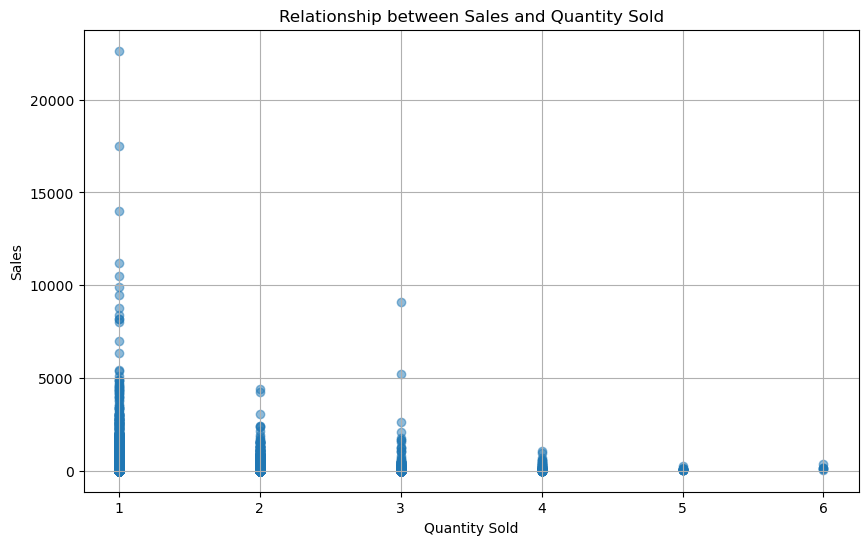

In [37]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['Sales'], alpha=0.5)
plt.title('Relationship between Sales and Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

## 9. Customer segment vs Quantity

### Compare the quantity sold across different customer segments using bar charts.

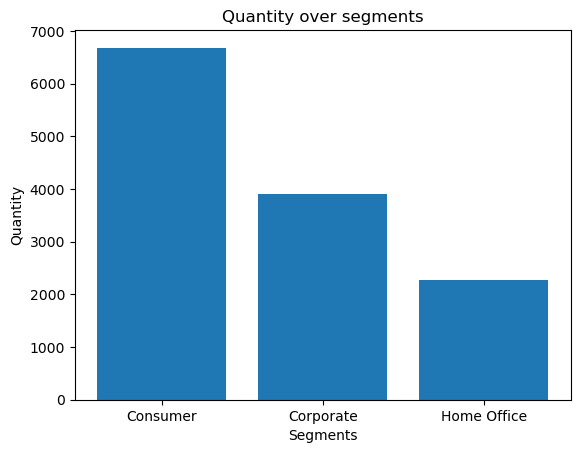

In [38]:
quantity_by_segment = df.groupby('Segment')['Quantity'].sum()             # Group by different segments and sum the quantity for eac
quantity_by_segment = quantity_by_segment.sort_values(ascending = False)  # sort in descending order

# create a bar chart to visualize quantity iver segments
plt.bar(quantity_by_segment.index,quantity_by_segment.values)
plt.title('Quantity over segments')
plt.xlabel('Segments')
plt.ylabel('Quantity')
plt.show()

## 11. Shipping Mode vs Sales

### Explore the relationship between shipping modes and sales using categorical plots

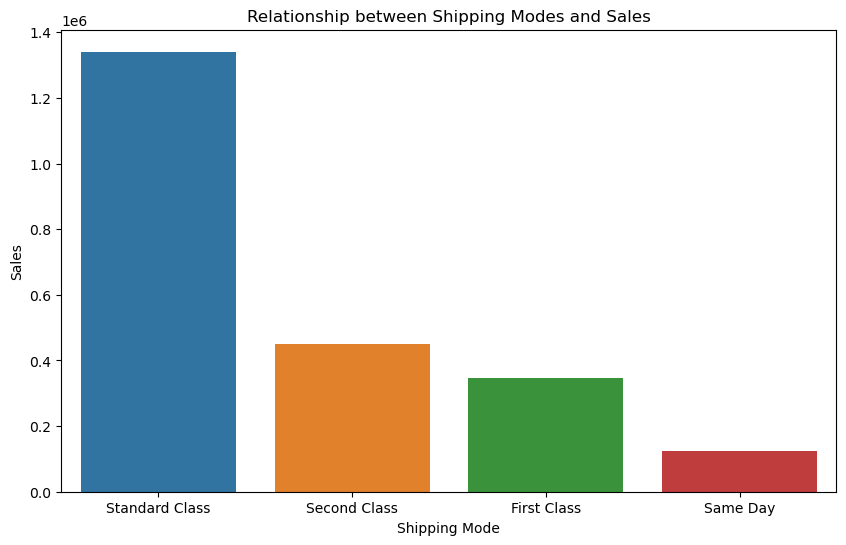

In [39]:
sales_by_ship_mode = data.groupby('Ship Mode')['Sales'].sum()           # Group by different ship modes and sum the sales for each ship mode
sales_by_ship_mode = sales_by_ship_mode.sort_values(ascending = False)  # sort in descending order
# Create a categorical plot (bar plot)
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_ship_mode.index, y=sales_by_ship_mode.values, ci=None)  # ci=None removes error bars
plt.title('Relationship between Shipping Modes and Sales')
plt.xlabel('Shipping Mode')
plt.ylabel('Sales')
plt.show()

## 12. Product-wise Sales Analysis

### Investigate how sales vary for different products or categories using line charts

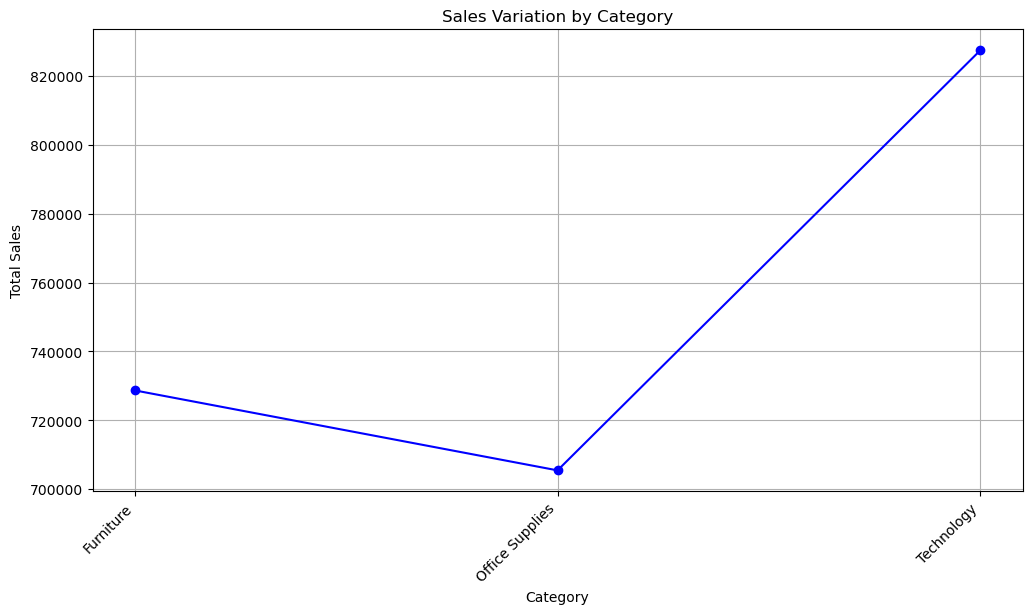

In [40]:
# Group by Category and sum the Sales for each category
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Line chart for sales by category
plt.figure(figsize=(12, 6))
plt.plot(category_sales['Category'], category_sales['Sales'], marker='o', linestyle='-', color='b')
plt.title('Sales Variation by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

## 13. Region-wise Product Sales

### Compare product sales across different regions using grouped bar charts

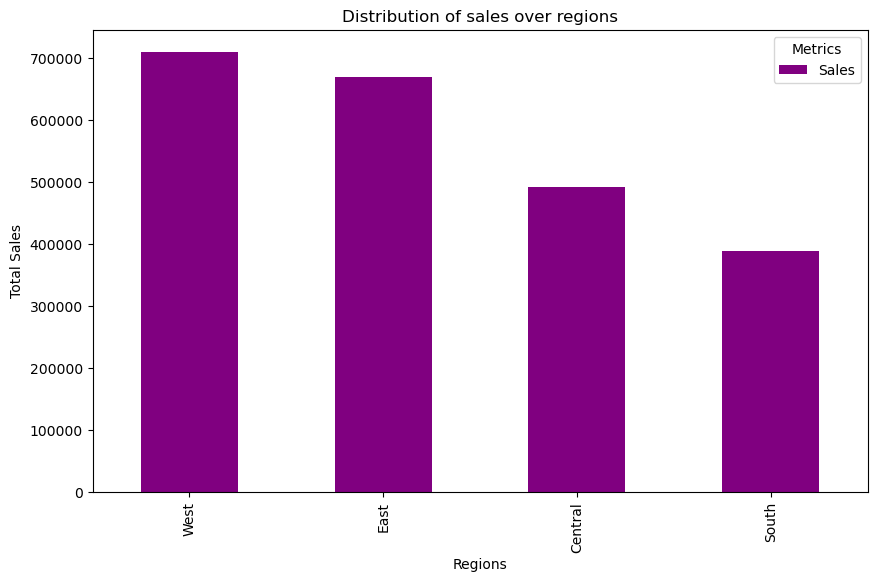

In [41]:
sales_by_region_ = data.groupby('Region')['Sales'].sum()           # Group by different regions and sum the sales for each region
sales_by_region_ = sales_by_region_.sort_values(ascending = False)  # sort in descending order
sales_by_region_.plot(kind = 'bar', stacked =True, figsize = (10,6),color = 'purple') # Visualize sales across different regions using stacked bar chart
plt.title('Distribution of sales over regions')
plt.xlabel('Regions')
plt.ylabel('Total Sales')
plt.legend(title='Metrics', loc='upper right')
plt.show()